# Human Activity Recognition

Importing modules

In [56]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Standard Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# Dimensionality Reduction
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import RandomizedSearchCV, learning_curve, KFold, cross_val_score

# Models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Models for Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Model Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

# Additional
from sklearn.tree import plot_tree

# Utility
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing Data

In [3]:
# Reading the training data from 'train.csv' into a Pandas DataFrame
train = pd.read_csv('train.csv')

# Reading the test data from 'test.csv' into a Pandas DataFrame
test = pd.read_csv('test.csv')

In [4]:
# Displaying the first few rows of the training data to get a quick overview
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [5]:
# Displaying the first few rows of the test data to inspect its structure
test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [6]:
# Displaying concise information about the training data to understand its composition and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
# Displaying concise information about the test data to understand its composition and data types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
# Displaying the shape (number of rows and columns) of the training data
train.shape

(7352, 563)

In [9]:
# Displaying the shape (number of rows and columns) of the testing data
test.shape

(2947, 563)

In [10]:
# Displaying the count of unique values in the 'subject' column of the training data
train['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [11]:
# Displaying the count of unique values in the 'subject' column of the test data
test['subject'].value_counts()

subject
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: count, dtype: int64

Data Pre-processing

In [12]:
# Printing the number of duplicate rows in the training data
print('Number of duplicates in train:', sum(train.duplicated()))

# Printing the number of duplicate rows in the test data
print('Number of duplicates in test:', sum(test.duplicated()))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [13]:
# Printing the number of missing values in the training data
print('Number of Missing values in train:', train.isna().values.sum())

# Printing the number of missing values in the test data
print('Number of Missing values in test:', test.isna().values.sum())

Number of Missing values in train: 0
Number of Missing values in test: 0


In [14]:
# Displaying the count of unique values in the 'Activity' column of the training data
train['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [15]:
# Finding and storing the names of duplicated columns in the training data
duplicated_columns_train = train.columns[train.T.duplicated()].tolist()

# Finding and storing the names of duplicated columns in the test data
duplicated_columns_test = test.columns[test.T.duplicated()].tolist()

In [16]:
# Printing the number of duplicated columns in the training data
print(len(duplicated_columns_train))

# Printing the number of duplicated columns in the test data
print(len(duplicated_columns_test))

21
21


In [17]:
# Dropping duplicated columns from the training data
train = train.drop(duplicated_columns_train, axis=1)

# Dropping duplicated columns from the test data
test = test.drop(duplicated_columns_test, axis=1)

In [18]:
train.shape

(7352, 542)

In [19]:
test.shape

(2947, 542)

In [20]:
# Displaying the sum of missing values for each column in the training data
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

In [21]:
# Displaying the sum of missing values for each column in the testing data
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

In [22]:
train['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

Data Visualisation

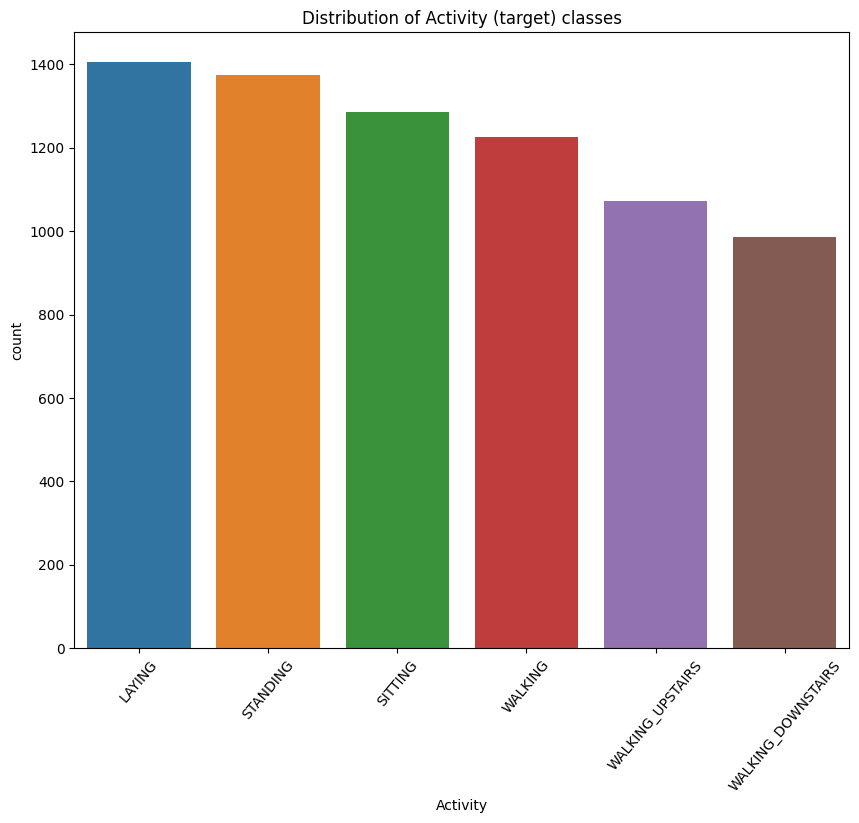

In [23]:
# Visualizing the distribution of the 'Activity' (target) classes in the training data using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a count plot for the 'Activity' column
sns.countplot(x=train['Activity'], data=train, order=train['Activity'].value_counts().index)

# Adding title and rotating x-axis labels for better readability
plt.title('Distribution of Activity (target) classes')
plt.xticks(rotation=50)

# Displaying the plot
plt.show()

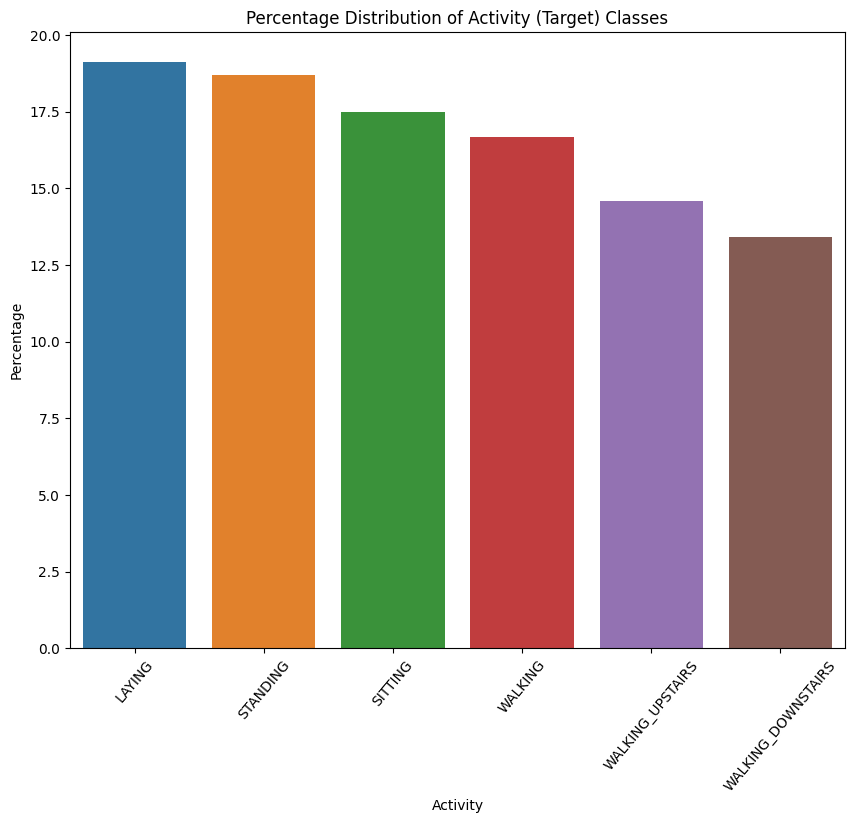

In [24]:
# Calculating the percentage distribution of the 'Activity' (target) classes in the training data
percentage_distribution = train['Activity'].value_counts(normalize=True) * 100

# Creating a bar plot with percentages
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, order=percentage_distribution.index)

# Adding title, labels, and rotating x-axis labels for better readability
plt.title('Percentage Distribution of Activity (Target) Classes')
plt.ylabel('Percentage')
plt.xticks(rotation=50)

# Displaying the plot
plt.show()

In [25]:
# Extracting prefixes from column names and counting their occurrences
prefix_counts = Counter([col.split('-')[0].split('(')[0] for col in train.columns])

# Creating a DataFrame from the Counter dictionary
prefix_df = pd.DataFrame.from_dict(prefix_counts, orient='index').rename(columns={0: 'count'}).sort_values('count', ascending=False)

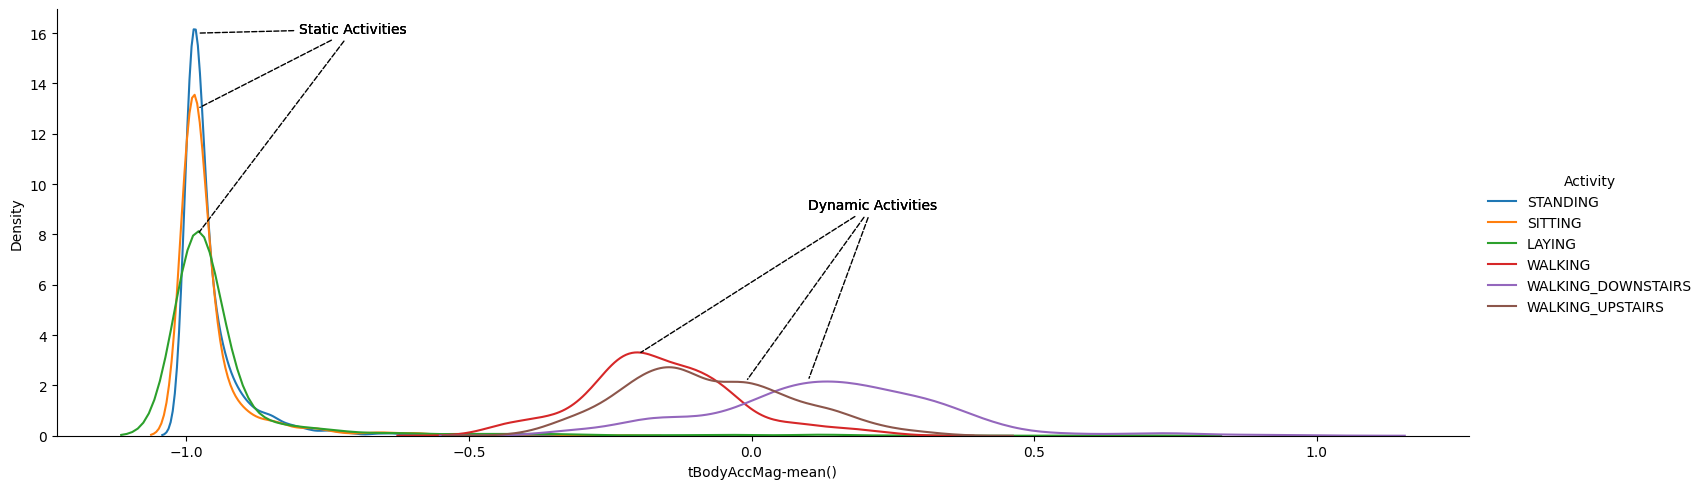

In [26]:
# Creating a FacetGrid to visualize the distribution of 'tBodyAccMag-mean()' for different activities
facetGrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)

# Mapping the distribution plot for 'tBodyAccMag-mean()' with legend
facetGrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

# Adding annotations for better interpretation
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.98, 13), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.98, 16), xytext=(-0.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2, 3.25), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1, 2.18), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01, 2.15), xytext=(0.1, 9), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

# Displaying the plot
plt.show()


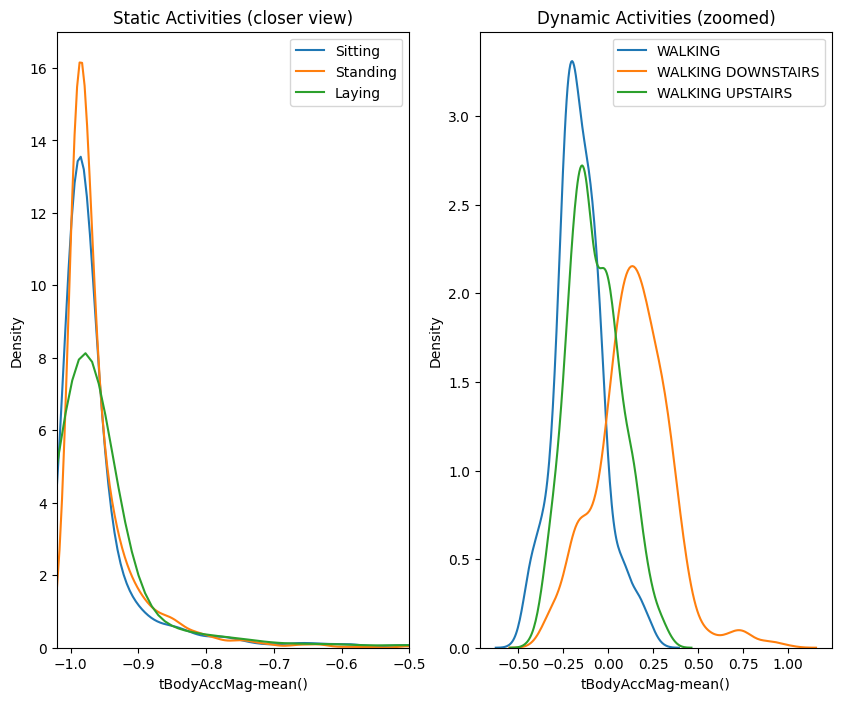

In [27]:
# Subplot 1: Static Activities (closer view)
plt.subplot(1, 2, 1)
plt.title("Static Activities (closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'], hist=False, label='Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'], hist=False, label='Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'], hist=False, label='Laying')
plt.axis([-1.02, -0.5, 0, 17])
plt.xlabel('tBodyAccMag-mean()')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Dynamic Activities (zoomed)
plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (zoomed)")
sns.distplot(train[train['Activity']=="WALKING"]['tBodyAccMag-mean()'], hist=False, label='WALKING')
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'], hist=False, label='WALKING DOWNSTAIRS')
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'], hist=False, label='WALKING UPSTAIRS')
plt.xlabel('tBodyAccMag-mean()')
plt.ylabel('Density')
plt.legend()

# Displaying the subplots
plt.show()

Feature Engineering

In [29]:
# Extracting features for PCA excluding 'subject' and 'Activity' columns
X_pca = train.drop(['subject', 'Activity'], axis=1)

# Applying PCA with 2 components to reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=0).fit_transform(X_pca)

In [30]:
pca

array([[-5.36382819, -0.30151337],
       [-5.31650718, -0.23677913],
       [-5.23630984,  0.13218318],
       ...,
       [ 5.58279574, -2.95850532],
       [ 5.16335555, -3.33266895],
       [ 5.26098022, -2.73358791]])

<Axes: >

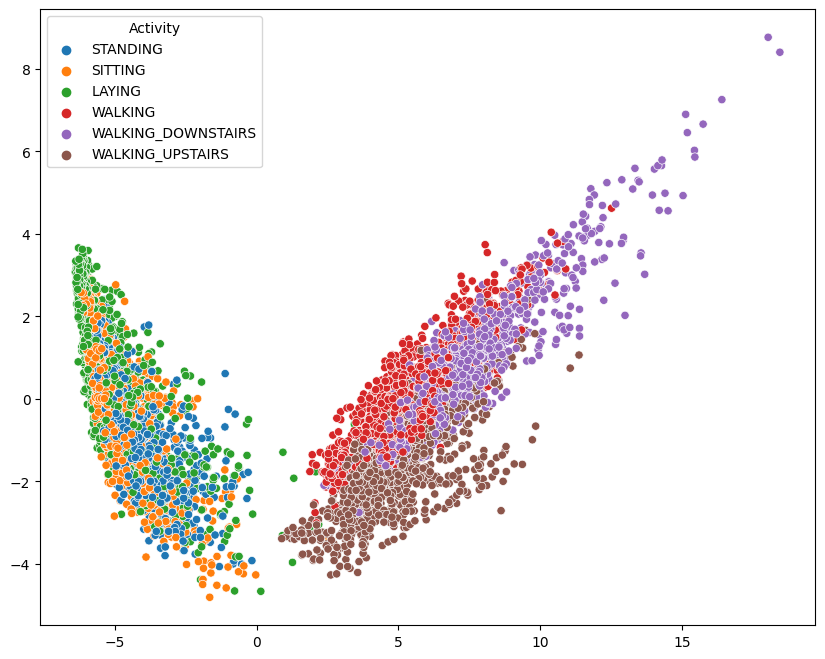

In [31]:
# Scatter plot with the first and second principal components, colored by 'Activity'
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train['Activity'])

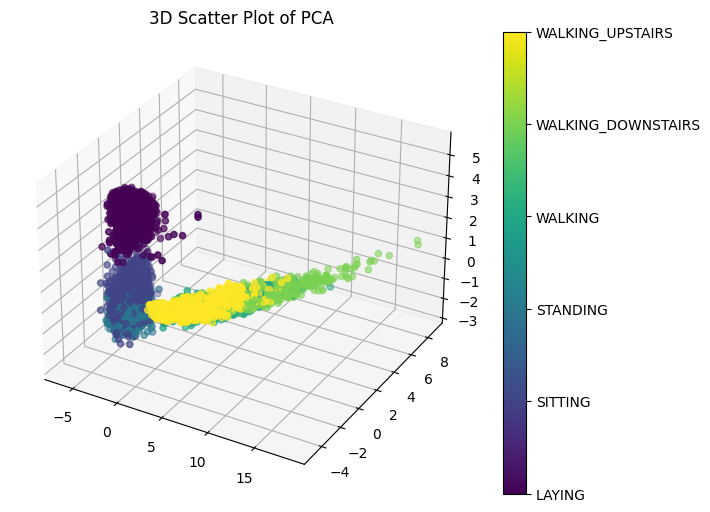

In [32]:
# Convert activity labels to numerical values
le = LabelEncoder()
activity_labels_encoded = le.fit_transform(train['Activity'])

# Perform PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3, random_state=0).fit_transform(X_pca)

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=activity_labels_encoded, cmap='viridis')
ax.set_title('3D Scatter Plot of PCA')

# Add a colorbar to show the correspondence between colors and activity labels
cbar = plt.colorbar(scatter, ticks=range(len(le.classes_)))
cbar.set_ticklabels(le.classes_)

# Display the plot
plt.show()

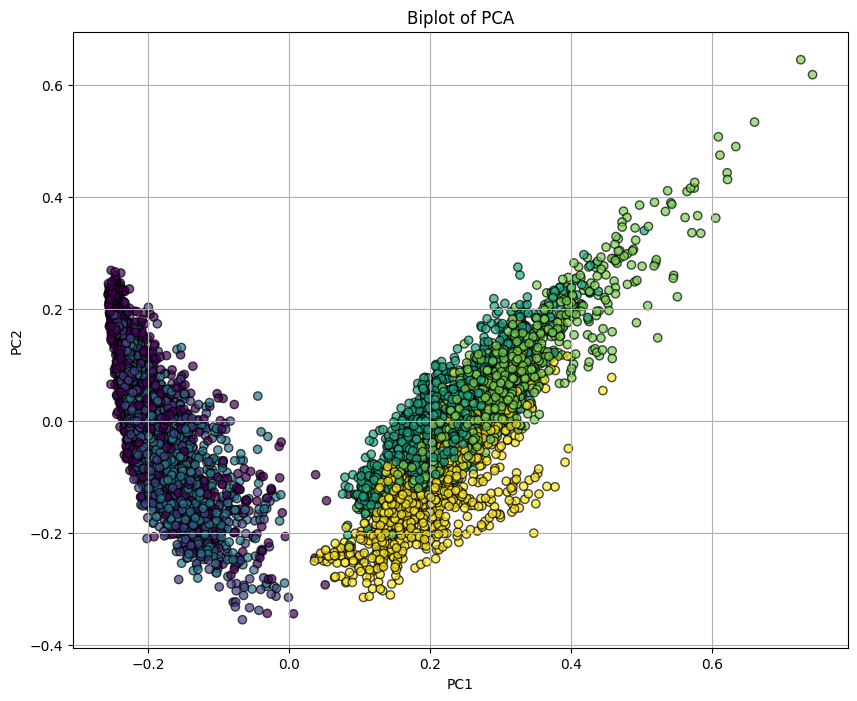

In [33]:
def biplot(score, coeff, target_names, feature_names=None, scaler=1):
    # Scaling the scores
    xs = score[:, 0] * scaler
    ys = score[:, 1] * scaler
    n = coeff.shape[0]

    # Scaling factors for arrows
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    # Scatter plot of scores
    plt.scatter(xs * scalex, ys * scaley, c=target_names, cmap='viridis', edgecolors='k', alpha=0.7)

    # Adding arrows for feature loadings
    if feature_names is not None:
        for i in range(n):
            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='g', ha='center', va='center')

    # Setting labels and grid
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Applying PCA and visualizing biplot
pca_result = PCA(n_components=2, random_state=0).fit(X_pca)
biplot(pca_result.transform(X_pca), pca_result.components_.T, target_names=activity_labels_encoded, feature_names=None, scaler=1000)
plt.title('Biplot of PCA')
plt.show()

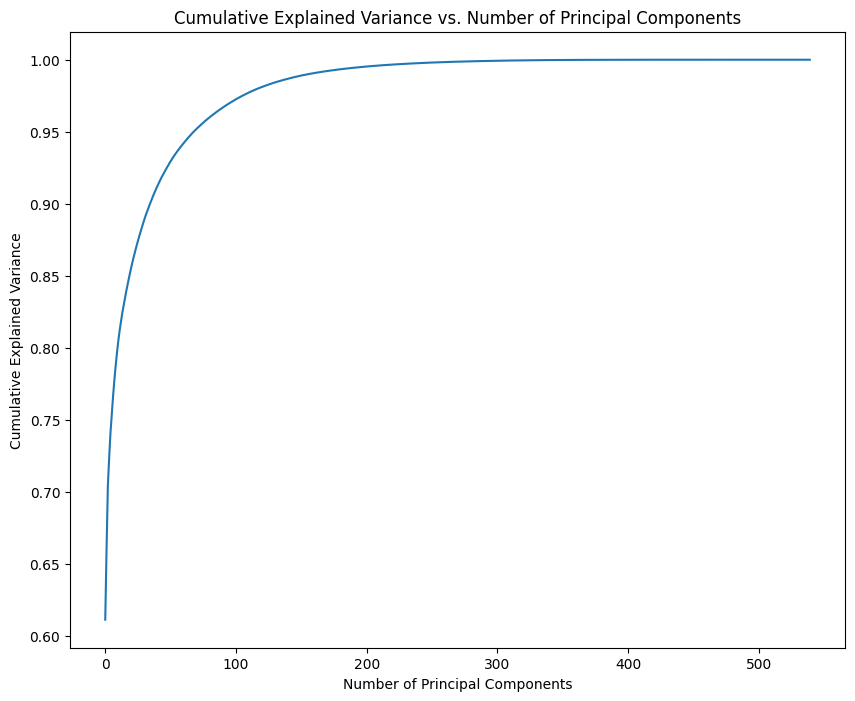

In [34]:
# Fitting PCA and plotting cumulative explained variance
pca = PCA(random_state=0).fit(X_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

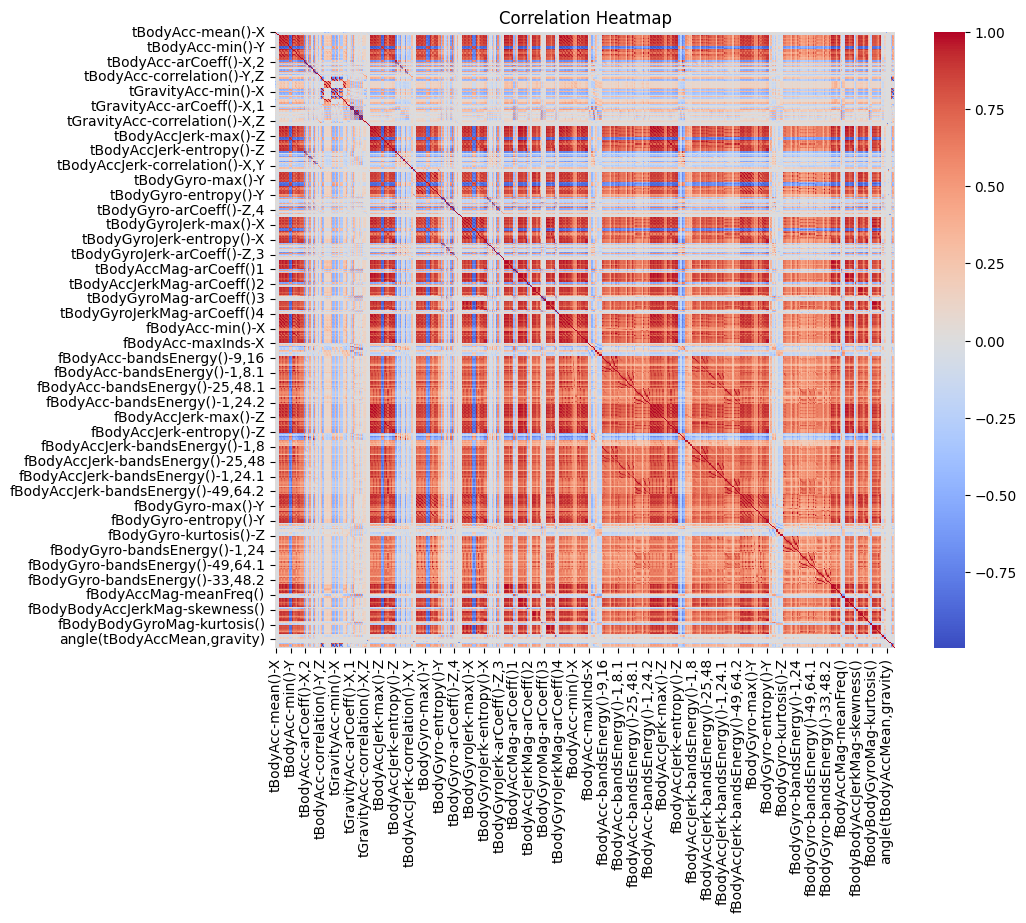

In [35]:
# Calculate correlation matrix excluding non-numeric columns
corr_matrix = train.select_dtypes(exclude=['object']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Extracting features for t-SNE excluding 'subject' and 'Activity' columns
X_tsne = train.drop(['subject', 'Activity'], axis=1)

# Applying t-SNE with 2 components and 1000 iterations
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(X_tsne)

In [37]:
tsne

array([[ -2.0334609, -59.290497 ],
       [-22.805807 , -12.95625  ],
       [-28.186132 , -19.816065 ],
       ...,
       [ 24.800562 , -64.473595 ],
       [ 24.67622  , -64.24716  ],
       [ 23.805925 , -63.74998  ]], dtype=float32)

<Axes: >

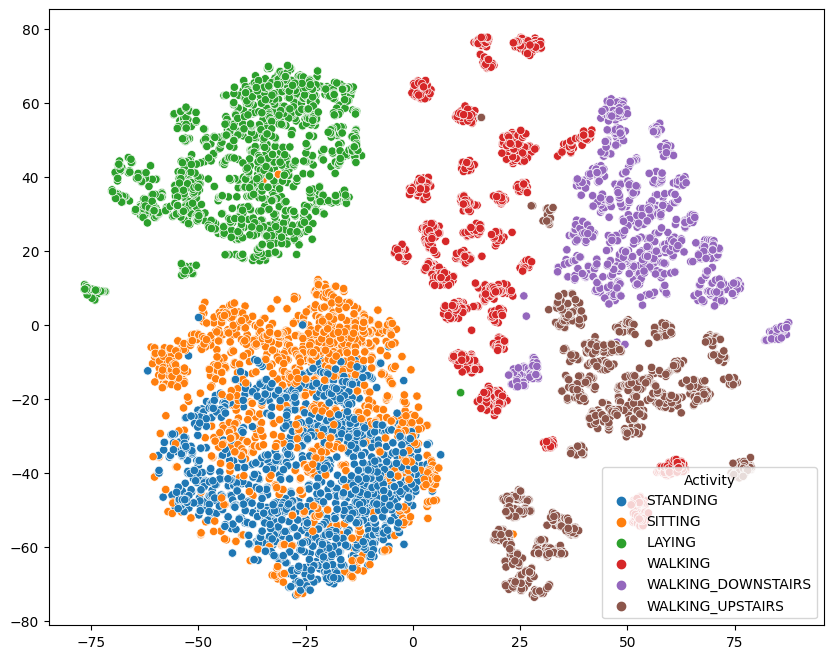

In [38]:
# Creating a scatter plot using t-SNE components
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train['Activity'])

Model Training

In [39]:
# Separating features and target labels for training and testing datasets
X_train = train.drop(['Activity', 'subject'], axis=1)
y_train = train['Activity']

X_test = test.drop(['Activity', 'subject'], axis=1)
y_test = test['Activity']

In [40]:
# Encoding target labels using LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [41]:
# Displaying the shape of the training and testing datasets
print('Shape of Train data:', X_train.shape)
print('Shape of Test data:', X_test.shape)

Shape of Train data: (7352, 540)
Shape of Test data: (2947, 540)


In [76]:
def plot_confusion_matrix(cm, label, best_estimator_name):
    # Plotting confusion matrix
    plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Setting labels and ticks
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=label,
        yticklabels=label,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.xticks(rotation=90)
    
    # Adding text annotations
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    
    # Adding title
    plt.title(f"{best_estimator_name} Confusion Matrix")
    
    fig.tight_layout()

In [43]:
def plot_learning_curve(model, X_train, y_train, cv=4, scoring='neg_mean_squared_error'):
    # Generating learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring=scoring)
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    # Plotting learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_rmse, axis=1), label='Training RMSE')
    plt.plot(train_sizes, np.mean(test_rmse, axis=1), label='Validation RMSE')
    plt.title(f"Learning Curve - {type(model).__name__}")
    plt.xlabel("Training Examples")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.show()

In [44]:
def plot_roc_curve(model, X_test, y_test):
    # Calculating ROC curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
def plot_feature_importance(model, X_train):
    # Checking if the model has attribute 'feature_importances_'
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Plotting feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f"Feature Importances - {type(model).__name__}")
        plt.show()

Hyperparameter Tuning

In [46]:
# Example hyperparameter grid for model tuning
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Hyperparameters for LogisticRegression
    'max_depth': [None, 10, 20, 30],  # Hyperparameters for DecisionTreeClassifier
    'n_estimators': [10, 50, 100, 200],  # Hyperparameters for RandomForestClassifier
    'kernel': ['linear', 'rbf'],  # Hyperparameters for SVC
}

Model Training

Model: LogisticRegression
Best Parameters: {'C': 1}
Mean Absolute Error (MAE): 0.05497115710892433
Mean Squared Error (MSE): 0.08686800135731253
Root Mean Squared Error (RMSE): 0.2947337804821709
R-squared Score: 0.9701572949225804
Accuracy: 0.9575839837122497


<Figure size 1000x600 with 0 Axes>

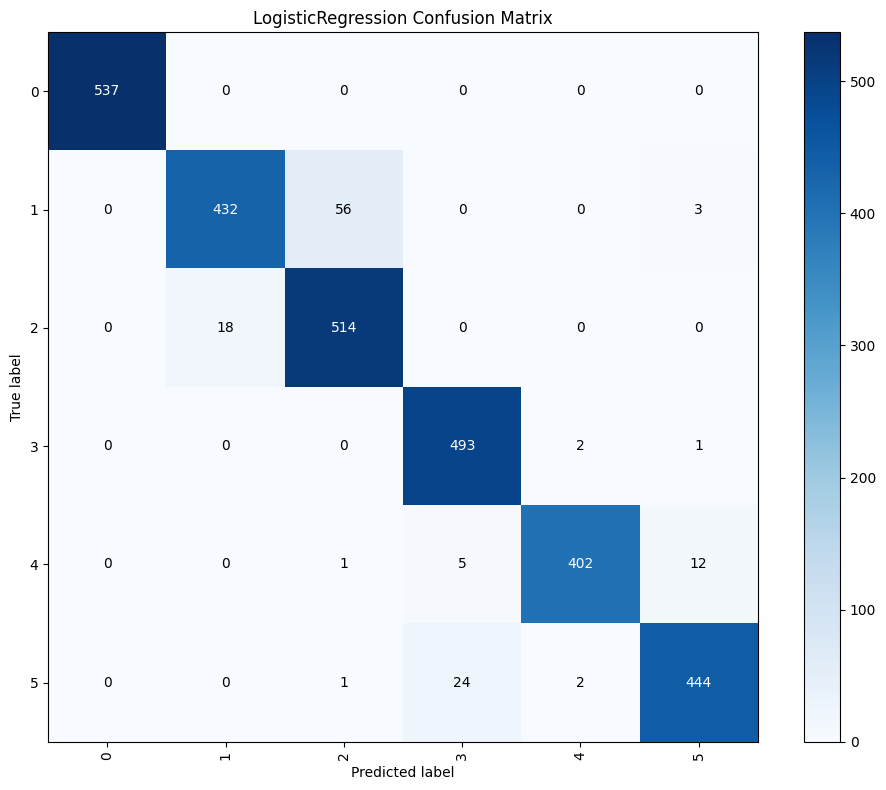

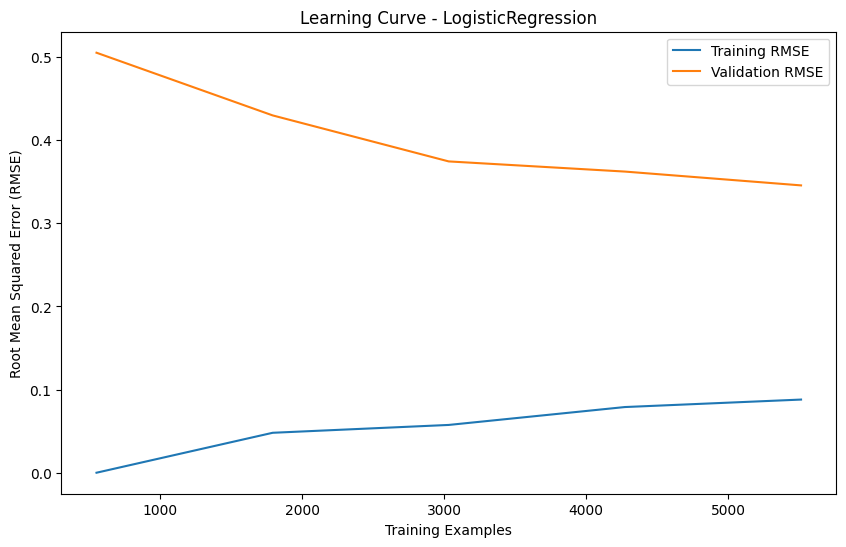



Model: DecisionTreeClassifier
Best Parameters: {'max_depth': 7}
Mean Absolute Error (MAE): 0.16457414319647098
Mean Squared Error (MSE): 0.21954530030539532
Root Mean Squared Error (RMSE): 0.4685566137676378
R-squared Score: 0.9245772258394902
Accuracy: 0.8629114353579912


<Figure size 1000x600 with 0 Axes>

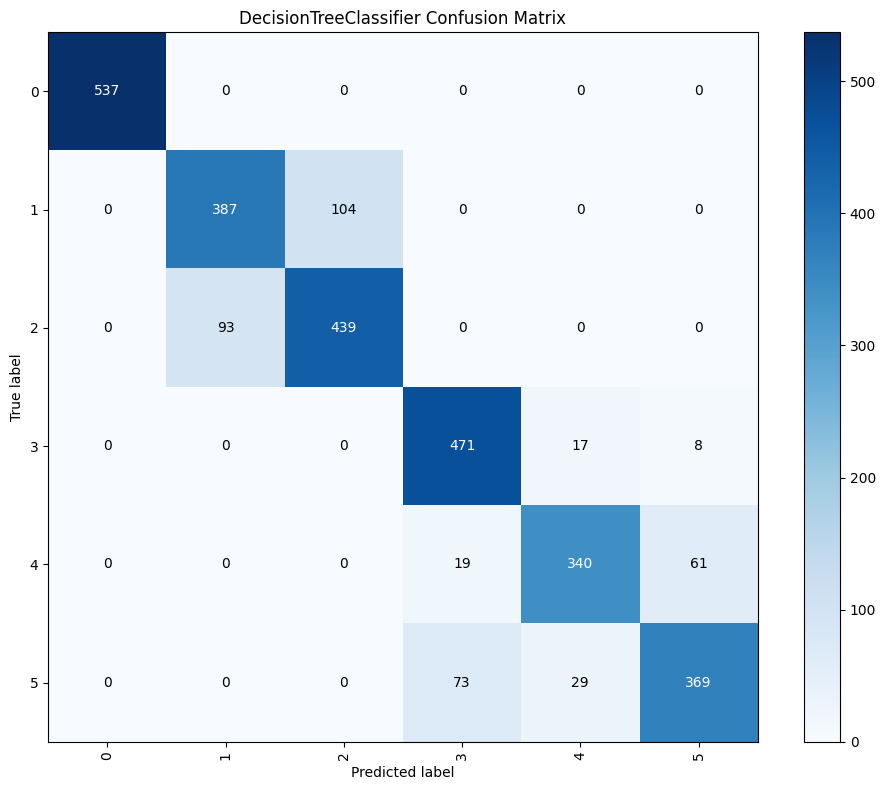

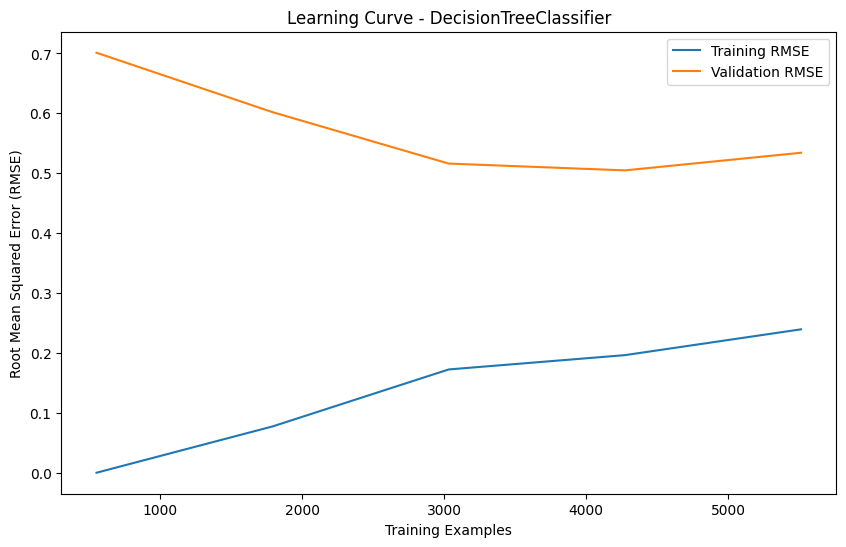



Model: RandomForestClassifier
Best Parameters: {'n_estimators': 200}
Mean Absolute Error (MAE): 0.08585001696640651
Mean Squared Error (MSE): 0.11299626739056667
Root Mean Squared Error (RMSE): 0.3361491743118919
R-squared Score: 0.9611811687860128
Accuracy: 0.9277231082456736


<Figure size 1000x600 with 0 Axes>

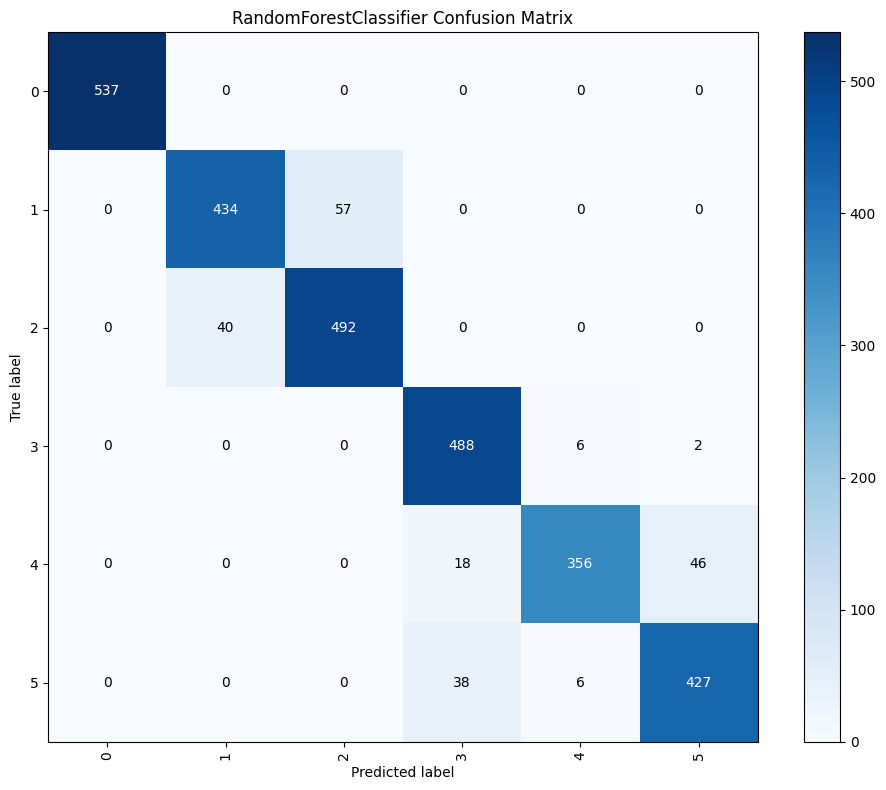

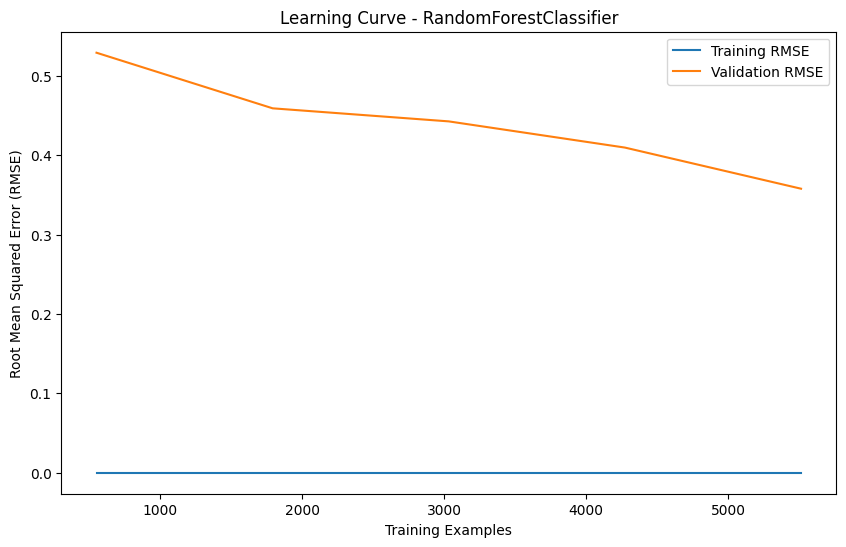



Model: SVC
Best Parameters: {'kernel': 'linear'}
Mean Absolute Error (MAE): 0.04207668815744825
Mean Squared Error (MSE): 0.061079063454360365
Root Mean Squared Error (RMSE): 0.2471417881588631
R-squared Score: 0.9790168479924394
Accuracy: 0.9653885307091958


<Figure size 1000x600 with 0 Axes>

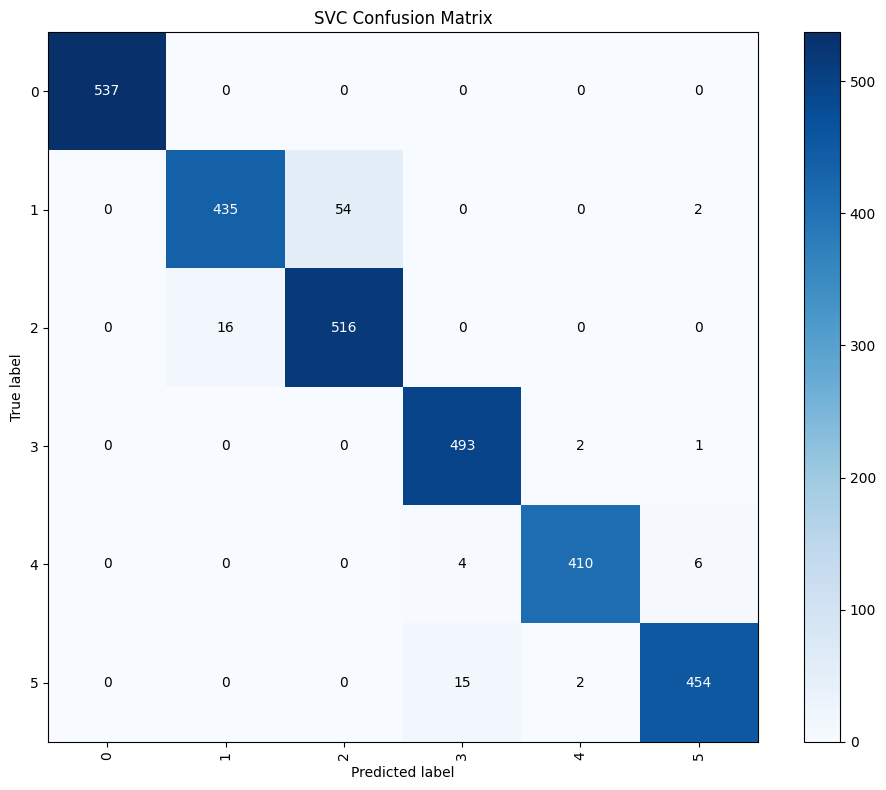

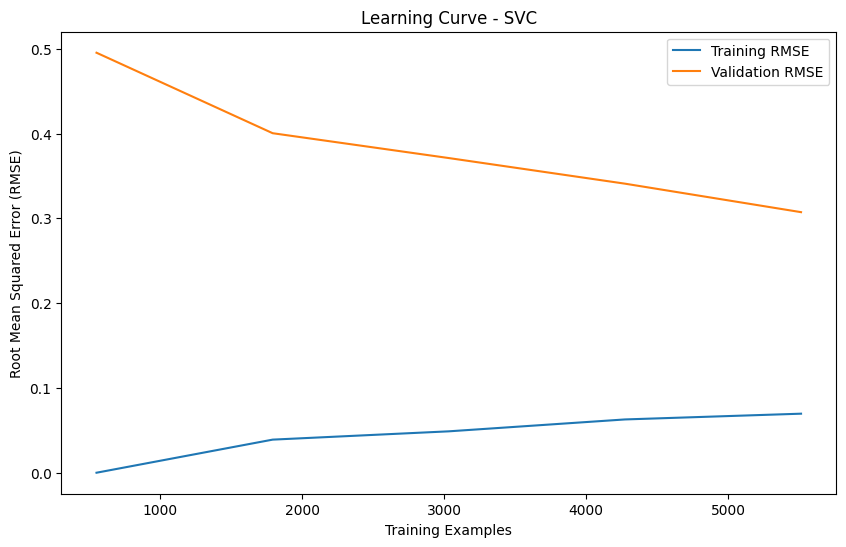

In [77]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
]

for model in models:
    # Extracting relevant hyperparameters based on the model type
    if isinstance(model, LogisticRegression):
        param_dist = {'C': parameters['C']}
    elif isinstance(model, DecisionTreeClassifier):
        param_dist = {'max_depth': parameters['max_depth']}
    elif isinstance(model, RandomForestClassifier):
        param_dist = {'n_estimators': parameters['n_estimators']}
    elif isinstance(model, SVC):
        param_dist = {'kernel': parameters['kernel']}
    else:
        raise ValueError(f"Unsupported model type: {type(model).__name__}")

    # Performing RandomizedSearchCV for hyperparameter tuning
    randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=4, random_state=42)
    randomized_search.fit(X_train, y_train)
    y_pred = randomized_search.predict(X_test)

    # Calculating evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

    # Displaying results and visualizations
    print(f"Model: {type(randomized_search.best_estimator_).__name__}")
    print(f"Best Parameters: {randomized_search.best_params_}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score: {r2}")
    print(f"Accuracy: {accuracy}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    best_estimator_name = type(randomized_search.best_estimator_).__name__
    plot_confusion_matrix(cm, label=np.unique(y_train), best_estimator_name=best_estimator_name)

    # Learning Curve

    # Learning Curve
    plot_learning_curve(randomized_search.best_estimator_, X_train, y_train)

    # ROC curve (if applicable)
    if hasattr(model, 'predict_proba') and len(np.unique(y_train)) == 2:
        plot_roc_curve(randomized_search.best_estimator_, X_test, y_test)

    plt.show()

    print("\n")


In [48]:
# Example hyperparameter grid for different models
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    # Add other hyperparameters as needed for your models
}

# Hyperparameter grid for MLPClassifier
mlp_param_dist = {
    'hidden_layer_sizes': [(100,), (50, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
}

# Hyperparameter grid for Artificial Neural Network (ANN)
ann_parameters = {
    'hidden_layer_sizes': [(100,), (50, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
}

# Hyperparameter grid for Long Short-Term Memory (LSTM)
lstm_parameters = {
    'units': [50, 100, 150],
    'dropout': [0.2, 0.3, 0.4],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128],
}

In [51]:
# Definition of LSTMRegressor class for regression using TensorFlow and Keras
class LSTMRegressor(tf.keras.Model):
    def __init__(self, units=50, dropout=0.2):
        super(LSTMRegressor, self).__init__()

        # LSTM layer with specified number of units and returning sequences
        self.lstm = LSTM(units, return_sequences=True)

        # Dropout layer with specified dropout rate
        self.dropout = Dropout(dropout)

        # Dense (fully connected) layer with 1 output unit for regression
        self.dense = Dense(1)

    def call(self, inputs):
        # Forward pass through the layers
        x = self.lstm(inputs)
        x = self.dropout(x)
        x = self.dense(x)
        return x

Model: LinearRegression
Mean Absolute Error (MAE): 0.2817184423919483
Mean Squared Error (MSE): 0.1486671485104549
Root Mean Squared Error (RMSE): 0.38557379126498587
R-squared Score: 0.9489267647652058
Accuracy: 0.9489267647652058




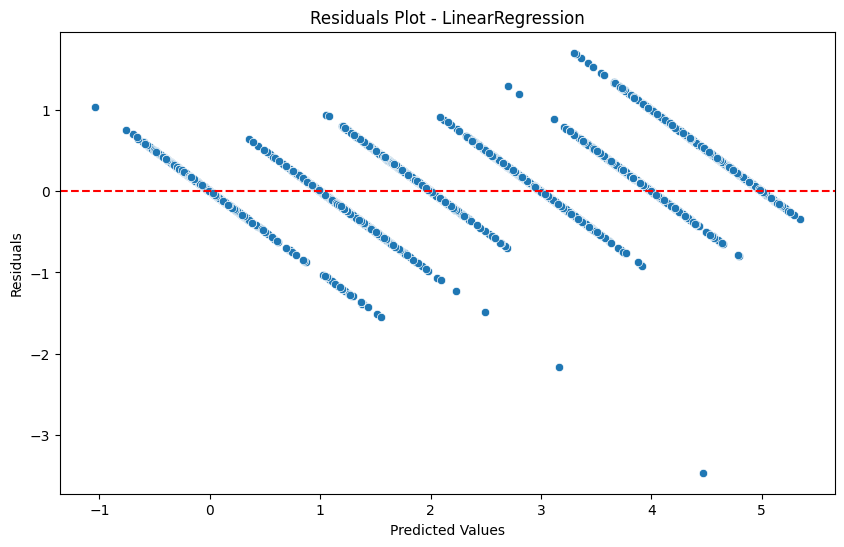

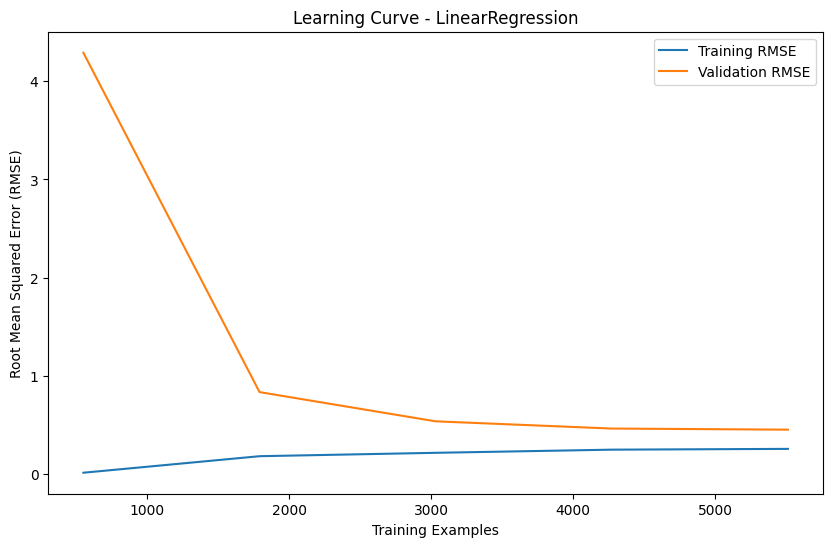

Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 0.16738242341370047
Mean Squared Error (MSE): 0.2019386005878801
Root Mean Squared Error (RMSE): 0.44937578994409577
R-squared Score: 0.9306258460315819
Accuracy: 0.9306258460315819




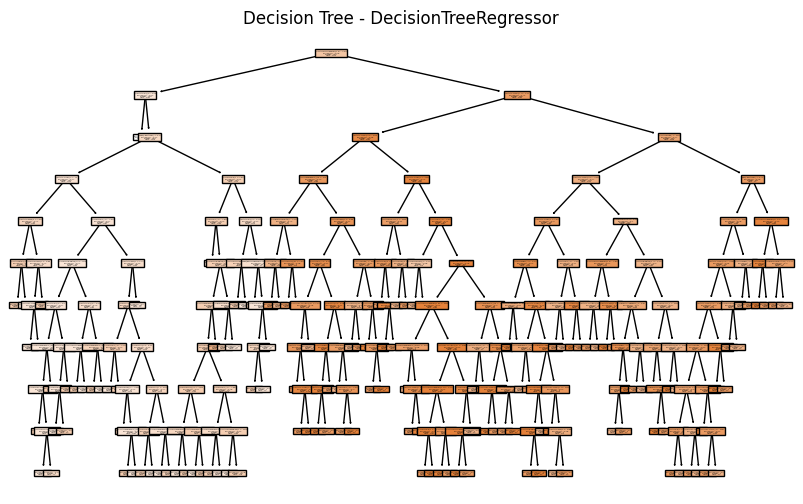

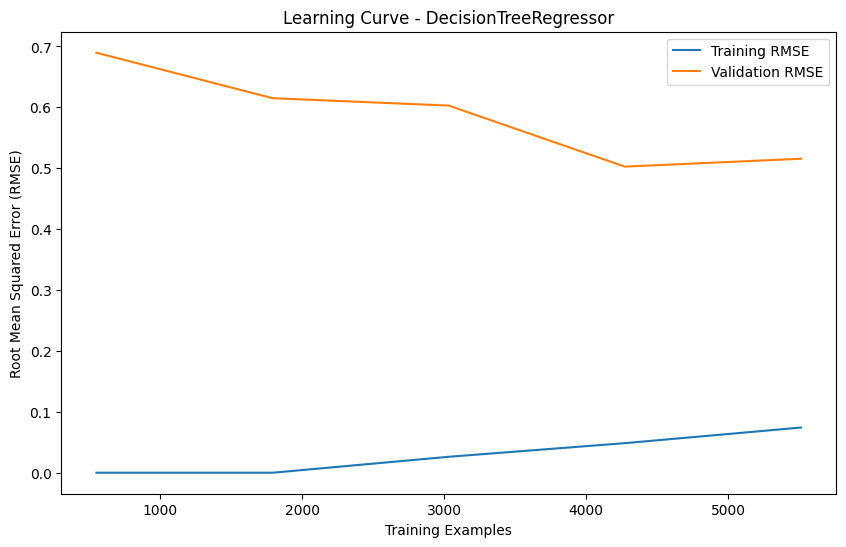

Model: RandomForestRegressor
Mean Absolute Error (MAE): 0.17694944010858502
Mean Squared Error (MSE): 0.11804631828978622
Root Mean Squared Error (RMSE): 0.3435786930090197
R-squared Score: 0.9594462701207209
Accuracy: 0.9594462701207209




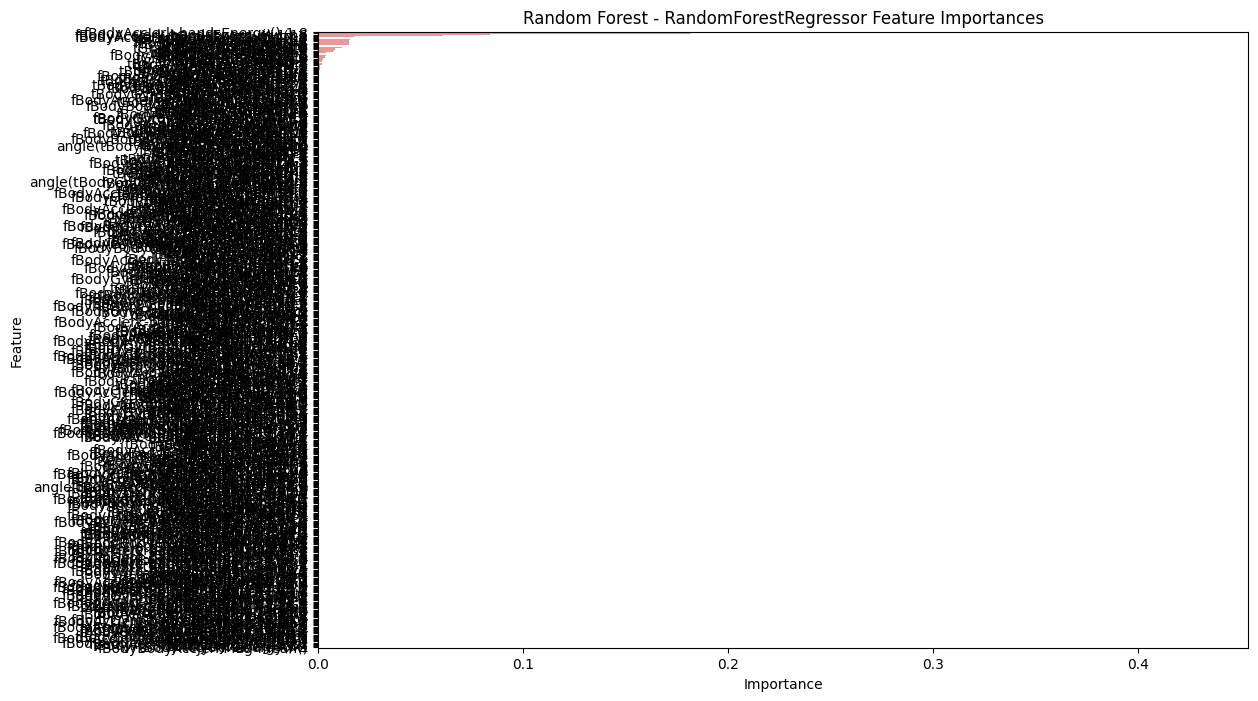

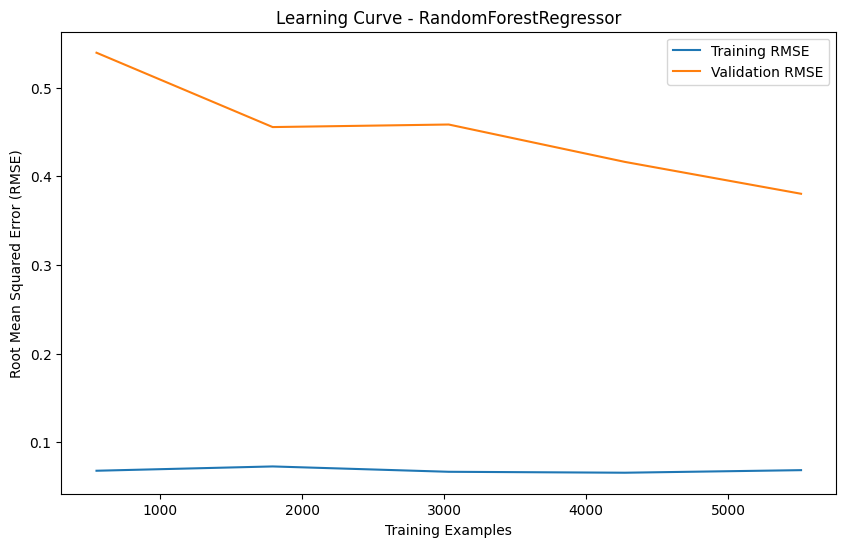

In [52]:
# List of regression models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

# Loop through each model for evaluation
for model in models:
    # Set hyperparameter search space based on model type
    if isinstance(model, DecisionTreeRegressor):
        param_dist = {'max_depth': parameters['max_depth']}
    elif isinstance(model, RandomForestRegressor):
        param_dist = {'n_estimators': parameters['n_estimators']}
    elif isinstance(model, LinearRegression):
        param_dist = {}  # No hyperparameters for LinearRegression
    elif isinstance(model, MLPClassifier):
        param_dist = ann_parameters  # Use ANN hyperparameters
    elif isinstance(model, LSTMRegressor):
        param_dist = lstm_parameters  # Use LSTM hyperparameters
    else:
        raise ValueError(f"Unsupported model type: {type(model).__name__}")

    # Perform randomized search for hyperparameter tuning
    randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=4, random_state=42)
    randomized_search.fit(X_train, y_train)
    y_pred = randomized_search.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = randomized_search.score(X_test, y_test)

    # Print evaluation metrics
    print(f"Model: {type(randomized_search.best_estimator_).__name__}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score: {r2}")
    print(f"Accuracy: {accuracy}")
    print("\n")

    # Visualization based on model type
    if isinstance(model, DecisionTreeRegressor):
        # Visualize Decision Tree
        plt.figure(figsize=(10, 6))
        plot_tree(randomized_search.best_estimator_, filled=True, feature_names=X_train.columns)
        plt.title(f"Decision Tree - {type(randomized_search.best_estimator_).__name__}")
        plt.show()
    elif isinstance(model, RandomForestRegressor):
        # Visualize Feature Importances for Random Forest
        feature_importances = randomized_search.best_estimator_.feature_importances_
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f"Random Forest - {type(randomized_search.best_estimator_).__name__} Feature Importances")
        plt.show()
    elif isinstance(model, LinearRegression):
        # Visualize Residuals for Linear Regression
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f"Residuals Plot - {type(randomized_search.best_estimator_).__name__}")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.show()

    # Add more visualizations as needed for other model types

    # Learning curve for all models
    train_sizes, train_scores, test_scores = learning_curve(randomized_search.best_estimator_, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_rmse, axis=1), label='Training RMSE')
    plt.plot(train_sizes, np.mean(test_rmse, axis=1), label='Validation RMSE')
    plt.title(f"Learning Curve - {type(randomized_search.best_estimator_).__name__}")
    plt.xlabel("Training Examples")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.show()

In [53]:
class LSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_units=100, learning_rate=0.001, epochs=10):
        # Initialize LSTMRegressor with hyperparameters
        self.n_units = n_units
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = None  # Initialize model attribute

    def fit(self, X, y):
        # Fitting logic for LSTMRegressor
        self.model = Sequential([
            LSTM(units=self.n_units, activation='tanh', input_shape=(X.shape[1], 1)),
            Dense(units=1)
        ])
        self.model.compile(optimizer='adam', loss='mean_squared_error')
        self.model.fit(X, y, epochs=self.epochs, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # Prediction logic for LSTMRegressor
        # Use self.model to make predictions
        return self.model.predict(X)

    def score(self, X, y):
        # Scoring logic for LSTMRegressor
        # Return a metric that reflects the model's performance
        # For example, return the R-squared score
        y_pred = self.predict(X)
        r2 = r2_score(y, y_pred)
        return r2

In [54]:
# Hyperparameter grid for MLPClassifier (Artificial Neural Network)
ann_parameters = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__max_iter': [200, 300, 400]
}

# Hyperparameter grid for LSTMRegressor
lstm_parameters = {
    'n_units': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 20, 30],
}

Model: Pipeline
Mean Absolute Error (MAE): 0.07159823549372243
Mean Squared Error (MSE): 0.1157108924329827
Root Mean Squared Error (RMSE): 0.34016303801704073
R-squared Score: 0.9602485842523434
Accuracy: 94.74%


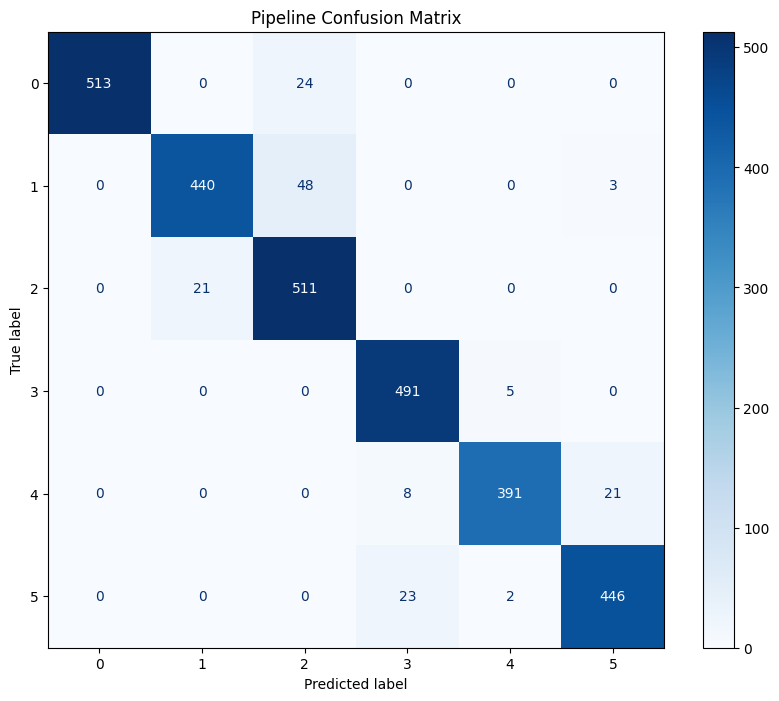

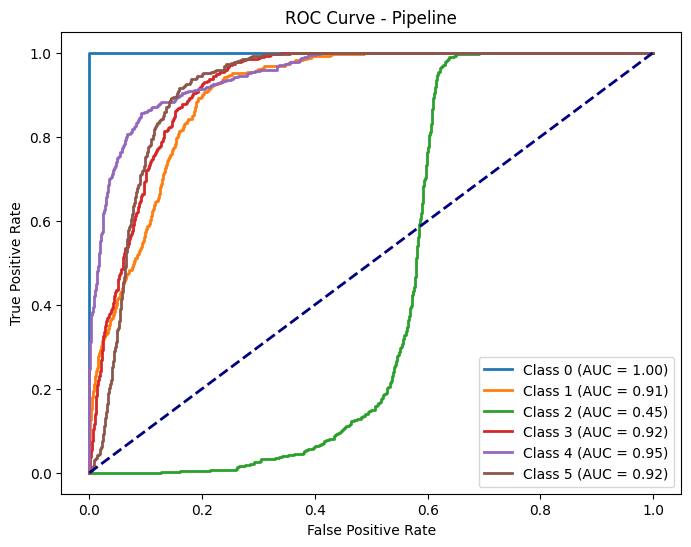

In [57]:
# Assuming ann_parameters and X_train, y_train, X_test, y_test are defined

# List of models, each as a pipeline with a StandardScaler and MLPClassifier
models = [Pipeline(steps=[('standardscaler', StandardScaler()), ('mlpclassifier', MLPClassifier())])]

for model in models:
    if isinstance(model, Pipeline):
        # Extract the MLPClassifier from the pipeline
        base_model = model.named_steps['mlpclassifier']
        param_dist = ann_parameters
    else:
        raise ValueError(f"Unsupported model type: {type(model).__name__}")

    # Fit the model
    model.fit(X_train, y_train)

    # Hyperparameter tuning using RandomizedSearchCV
    randomized_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        cv=4,
        random_state=42,
        n_iter=10  # Adjust the number of iterations as needed
    )
    randomized_search.fit(X_train, y_train)
    y_pred = randomized_search.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {type(randomized_search.best_estimator_).__name__}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score: {r2}")
    print(f"Accuracy: {accuracy:.2%}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Access the classes from the fitted RandomizedSearchCV object
    classes = randomized_search.classes_

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues')  # Set the color map directly here
    plt.title(f"{type(randomized_search.best_estimator_).__name__} Confusion Matrix")
    plt.show()

    # ROC Curve (if the base model has predict_proba method and there are more than two classes)
    if hasattr(base_model, 'predict_proba') and len(classes) > 2:
        y_prob = base_model.predict_proba(X_test)

        # Compute ROC curve and AUC for each class
        plt.figure(figsize=(8, 6))
        for i in range(len(classes)):
            fpr, tpr, thresholds = roc_curve(y_test == classes[i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {type(randomized_search.best_estimator_).__name__}')
        plt.legend(loc="lower right")
        plt.show()

    print("\n")

Cross-validation

In [58]:
# Specify hyperparameters for each model type
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],            # Hyperparameter for Support Vector Machines (SVM)
    'max_depth': [3, 5, 7, None],              # Hyperparameter for Decision Trees
    'n_estimators': [50, 100, 200],            # Hyperparameter for Random Forest
    'kernel': ['linear', 'rbf', 'poly'],       # Hyperparameter for Support Vector Machines (SVM)
}

Model: LogisticRegression
Best Parameters: {'C': 1}
Average Accuracy: 0.982318659618844


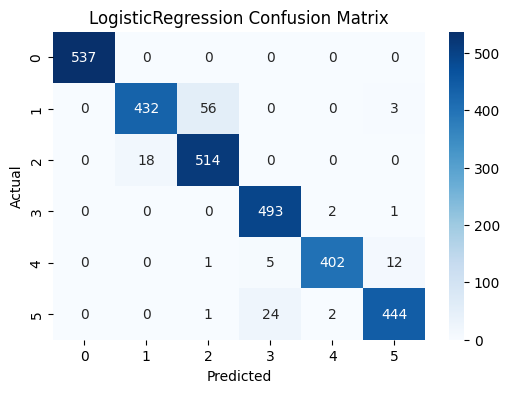



Model: DecisionTreeClassifier
Best Parameters: {'max_depth': None}
Average Accuracy: 0.9385190323580146


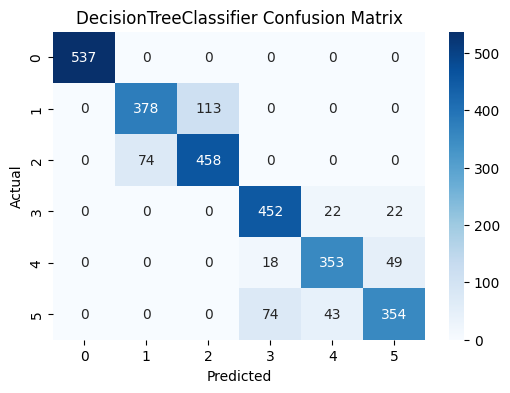



Model: RandomForestClassifier
Best Parameters: {'n_estimators': 200}
Average Accuracy: 0.982726082955276


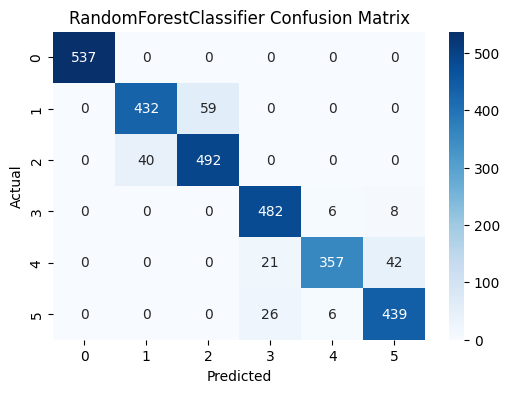



Model: SVC
Best Parameters: {'kernel': 'linear'}
Average Accuracy: 0.9851752475293314


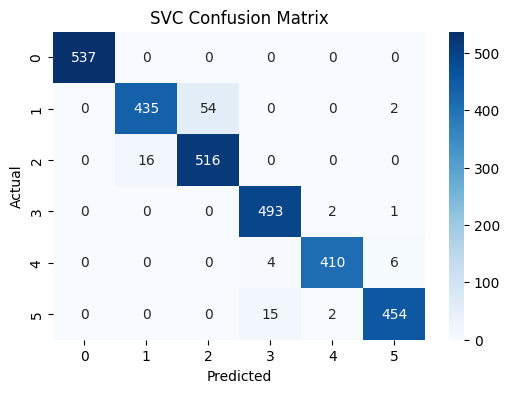

In [59]:
# Define your models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
]

# Perform k-fold cross-validation for each model
for model in models:
    if isinstance(model, Pipeline):
        base_model = model.named_steps['classifier']  # Adjust 'classifier' to the actual name in your pipeline
        if isinstance(base_model, LogisticRegression):
            param_dist = {'classifier__C': parameters['C']}
        elif isinstance(base_model, DecisionTreeClassifier):
            param_dist = {'classifier__max_depth': parameters['max_depth']}
        elif isinstance(base_model, RandomForestClassifier):
            param_dist = {'classifier__n_estimators': parameters['n_estimators']}
        elif isinstance(base_model, SVC):
            param_dist = {'classifier__kernel': parameters['kernel']}
        else:
            raise ValueError(f"Unsupported base model type: {type(base_model).__name__}")
    elif isinstance(model, LogisticRegression):
        param_dist = {'C': parameters['C']}
    elif isinstance(model, DecisionTreeClassifier):
        param_dist = {'max_depth': parameters['max_depth']}
    elif isinstance(model, RandomForestClassifier):
        param_dist = {'n_estimators': parameters['n_estimators']}
    elif isinstance(model, SVC):
        param_dist = {'kernel': parameters['kernel']}
    else:
        raise ValueError(f"Unsupported model type: {type(model).__name__}")

    # Use KFold for k-fold cross-validation (k=5 in this example)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform randomized search within each fold
    randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=kf, random_state=42)

    # Get cross-validated scores
    scores = cross_val_score(randomized_search, X_train, y_train, cv=kf, scoring='accuracy')

    # Fit the model with the best hyperparameters on the entire training set
    randomized_search.fit(X_train, y_train)

    # Print average accuracy across folds
    print(f"Model: {type(model).__name__}")
    print(f"Best Parameters: {randomized_search.best_params_}")
    print(f"Average Accuracy: {np.mean(scores)}")

    # Get predictions using the best estimator
    y_pred = randomized_search.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{type(model).__name__} Confusion Matrix")
    plt.show()

    print("\n")

Fitting RandomizedSearchCV...
Best Hyperparameters: {}
Performance Metrics:
Mean Absolute Error (MAE): 0.2817184423919483
Mean Squared Error (MSE): 0.1486671485104549
Root Mean Squared Error (RMSE): 0.38557379126498587
R-squared Score: 0.9489267647652058
Accuracy: 0.9489267647652058


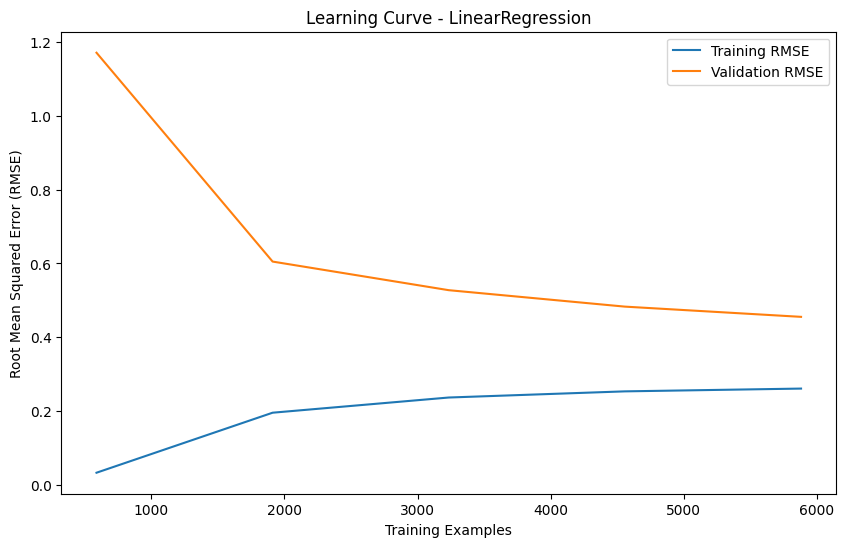

Fitting RandomizedSearchCV...
Best Hyperparameters: {'max_depth': 7}
Performance Metrics:
Mean Absolute Error (MAE): 0.19133173712567503
Mean Squared Error (MSE): 0.20240871754969456
Root Mean Squared Error (RMSE): 0.44989856362261765
R-squared Score: 0.930464341661456
Accuracy: 0.930464341661456


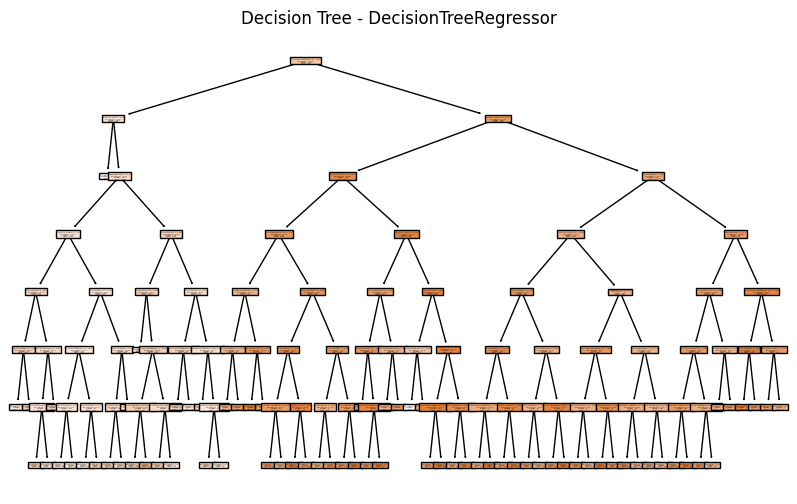

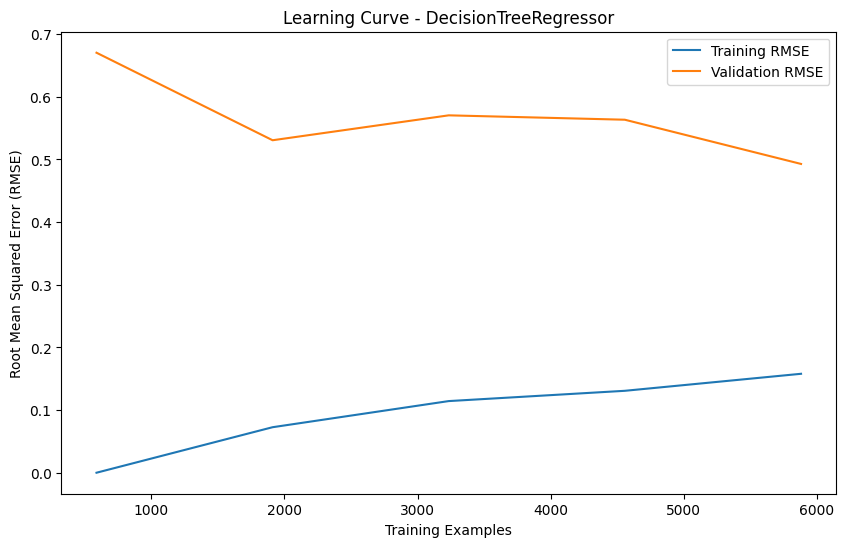

Fitting RandomizedSearchCV...
Best Hyperparameters: {'n_estimators': 200}
Performance Metrics:
Mean Absolute Error (MAE): 0.1742958941296233
Mean Squared Error (MSE): 0.11520444519850695
Root Mean Squared Error (RMSE): 0.3394178033022236
R-squared Score: 0.9604225695544061
Accuracy: 0.9604225695544061


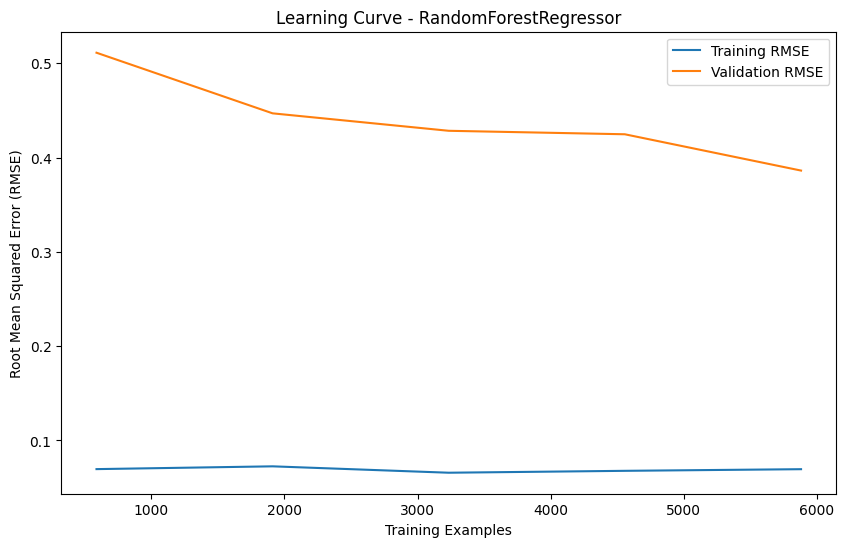

In [67]:
# Define the number of folds
k_folds = 5  # You can adjust this value based on your preference

# Define the models to be evaluated
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

# Convert y_train back to a Pandas Series
y_train_series = pd.Series(y_train)

# Loop through each model for evaluation
for model in models:
    # Set hyperparameters based on the model type
    if isinstance(model, DecisionTreeRegressor):
        param_dist = {'max_depth': parameters['max_depth']}
    elif isinstance(model, RandomForestRegressor):
        param_dist = {'n_estimators': parameters['n_estimators']}
    elif isinstance(model, LinearRegression):
        param_dist = {}  # No hyperparameters for LinearRegression
    elif isinstance(model, MLPClassifier):
        param_dist = ann_parameters  # Use ANN hyperparameters
    elif isinstance(model, LSTMRegressor):
        param_dist = lstm_parameters  # Use LSTM hyperparameters
    else:
        raise ValueError(f"Unsupported model type: {type(model).__name__}")

    # Ensure that y_train is an array of integers
    print("Fitting RandomizedSearchCV...")
    randomized_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        cv=KFold(n_splits=k_folds, shuffle=True, random_state=42),
        random_state=42,
        scoring='neg_mean_squared_error'  # Use regression metric
    )

    randomized_search.fit(X_train, y_train_series)

    # Check Best Parameters
    print("Best Hyperparameters:", randomized_search.best_params_)

    # Create a new instance of the model with the best hyperparameters
    best_model = model.__class__(**randomized_search.best_params_)

    # Fit the best model
    best_model.fit(X_train, y_train_series)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2  # For regression, accuracy is often measured using R-squared

    # Display Performance Metrics
    print("Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared Score: {r2}")
    print(f"Accuracy: {accuracy}")

    # Visualization
    if isinstance(model, DecisionTreeRegressor):
        # Visualize Decision Tree
        plt.figure(figsize=(10, 6))
        plot_tree(
            best_model, filled=True, feature_names=X_train.columns
        )
        plt.title(f"Decision Tree - {type(model).__name__}")
        plt.show()

    # Add more visualizations as needed for other model types

    # Learning curve for all models
    train_sizes, train_scores, test_scores = learning_curve(
        best_model,
        X_train,
        y_train_series,
        cv=k_folds,
        scoring='neg_mean_squared_error'
    )
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_rmse, axis=1), label='Training RMSE')
    plt.plot(train_sizes, np.mean(test_rmse, axis=1), label='Validation RMSE')
    plt.title(f"Learning Curve - {type(model).__name__}")
    plt.xlabel("Training Examples")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.show()